In [2]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 



os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal


# This updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r"/Users/peihanyu/Desktop/Program/archive/brain_tumor_dataset/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
            


for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

# This updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/Users/peihanyu/Desktop/Program/archive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))


for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


data = np.array(data)
result = np.array(result)



In [3]:
os.listdir(r"/Users/peihanyu/Desktop/Program/archive/brain_tumor_dataset/yes")

['Y157.JPG',
 'Y6.jpg',
 'Y194.jpg',
 'Y180.jpg',
 'Y90.jpg',
 'Y47.JPG',
 'Y53.jpg',
 'Y52.jpg',
 'Y46.jpg',
 'Y91.jpg',
 'Y85.JPG',
 'Y181.jpg',
 'Y195.JPG',
 'Y7.jpg',
 'Y156.JPG',
 'Y168.jpg',
 'Y154.jpg',
 'Y183.jpg',
 'Y78.jpg',
 'Y50.JPG',
 'Y44.JPG',
 'Y45.JPG',
 'Y51.jpg',
 'Y79.jpg',
 'Y86.JPG',
 'Y92.jpg',
 'Y92.png',
 'Y182.JPG',
 'Y155.JPG',
 'Y4.jpg',
 'Y169.jpg',
 'Y186.jpg',
 'Y192.JPG',
 'Y96.jpg',
 'Y82.jpg',
 'Y55.jpg',
 'Y41.jpg',
 'Y69.jpg',
 'Y40.JPG',
 'Y54.jpg',
 'Y97.JPG',
 'Y193.JPG',
 'Y187.jpg',
 'Y1.jpg',
 'Y3.jpg',
 'Y146.JPG',
 'Y185.jpg',
 'Y81.jpg',
 'Y95.jpg',
 'Y42.jpg',
 'Y56.jpg',
 'Y184.JPG',
 'Y2.jpg',
 'Y147.JPG',
 'Y153.jpg',
 'Y108.jpg',
 'Y120.JPG',
 'Y242.JPG',
 'Y256.JPG',
 'Y18.JPG',
 'Y24.jpg',
 'Y30.jpg',
 'Y31.jpg',
 'Y25.jpg',
 'Y19.JPG',
 'Y257.jpg',
 'Y243.JPG',
 'Y109.JPG',
 'Y255.JPG',
 'Y33.jpg',
 'Y27.jpg',
 'Y26.jpg',
 'Y32.jpg',
 'Y254.jpg',
 'Y250.jpg',
 'Y244.JPG',
 'Y36.JPG',
 'Y22.jpg',
 'Y23.JPG',
 'Y37.jpg',
 'Y245.jpg',
 

In [3]:
print(result)
result = result.reshape(139,2)

[[[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0

In [4]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [11]:
def model():

    model = Sequential()

    model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
    model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
    model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
    return model

model_null, model_alter = t_model(), t_model()

In [13]:
## Inference based on dnn_inference
from dnn_inference.sig_test import split_test
## testing based on learning models


In [14]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min',verbose=0, patience=30, restore_best_weights=True)


fit_params = {'callbacks': [es],
            'epochs': 30,
            'batch_size': 32,
            'validation_split': .2,
            'verbose': 0}

## testing params
test_params = { 'split': "one-split",
                'inf_ratio': None,
                'perturb': None,
                'cv_num': 2,
                'cp': 'hommel',
                'verbose': 2}

## tuning params
tune_params = { 'num_perm': 100,
                'ratio_grid': [.2, .4, .6, .8],
                'if_reverse': 0,
                'perturb_range': 2.**np.arange(-3,3,.1),
                'tune_ratio_method': 'fuse',
                'tune_pb_method': 'fuse',
                'cv_num': 2,
                'cp': 'hommel',
                'verbose': 2}

In [15]:
from dnn_inference.sig_test import split_test
## testing based on learning models
inf_feats = [[(np.arange(10,64),np.arange(64,110))]]
cue = split_test(inf_feats=inf_feats, model_null = model_null, model_alter=model_alter, eva_metric='zero-one')
P_value = cue.testing(x_train, y_train, fit_params, test_params, tune_params)

INFO:tensorflow:Assets written to: ./saved/split_test/03-03_15-25/model_null_init/assets


INFO:tensorflow:Assets written to: ./saved/split_test/03-03_15-25/model_null_init/assets


INFO:tensorflow:Assets written to: ./saved/split_test/03-03_15-25/model_alter_init/assets


INFO:tensorflow:Assets written to: ./saved/split_test/03-03_15-25/model_alter_init/assets


==================== one-split test for 0-th Hypothesis ====================
(tuneHP: ratio) Est. Type 1 error: 0.030; inf sample ratio: 0.200
✅ (tuneHP: ratio) Done with inf sample ratio: 0.200
(tuneHP: pb) Est. Type 1 error: 0.000; perturbation level: 0.125
✅ (tuneHP: pb) Done with inf pb level: 0.125
cv: 0; p_value: 0.11168; loss_null: 0.27273(0.44536); loss_alter: 0.36364(0.48105)
cv: 1; p_value: 0.30733; loss_null: 0.18182(0.38569); loss_alter: 0.22727(0.41907)
 🧪 0-th Hypothesis: accept H0 with p_value: 0.335
==================== one-split test for 1-th Hypothesis ====================
(tuneHP: ratio) Est. Type 1 error: 0.000; inf sample ratio: 0.200
✅ (tuneHP: ratio) Done with inf sample ratio: 0.200
(tuneHP: pb) Est. Type 1 error: 0.020; perturbation level: 0.125
✅ (tuneHP: pb) Done with inf pb level: 0.125
cv: 0; p_value: 0.02426; loss_null: 0.18182(0.38569); loss_alter: 0.31818(0.46577)
cv: 1; p_value: 0.86121; loss_null: 0.22727(0.41907); loss_alter: 0.18182(0.38569)
 🧪 1-th 

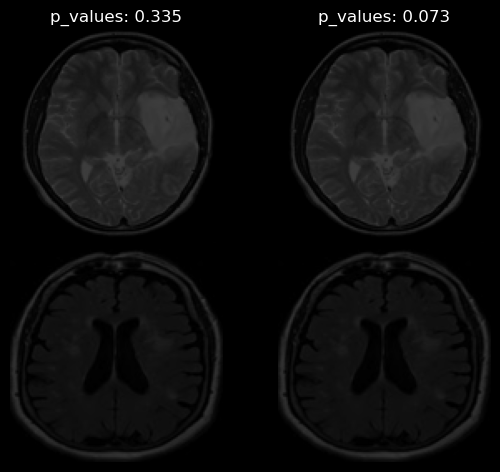

P-values: [0.33505442086543896, 0.07277126127025235]


In [16]:
## visualize testing results
cue.visual(x_train,y_train)
print('P-values: %s' %P_value)
